# Forecast

- load trained model
- compute ensemble
- export in submission format

### Setup

In [1]:
import sys
sys.path.append('../')
from src.load_data import *
from src.realtime_utils import *
from src.plot_functions import *
from src.hp_tuning_functions import *
import torch
from darts.utils.likelihood_models import NegativeBinomialLikelihood
from pytorch_lightning.callbacks import RichProgressBar

In [2]:
from darts.models import TSMixerModel

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/statsforecast/utils.py:231: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


### Configuration

In [3]:
NUM_SAMPLES = 1000
HORIZON = 4

# Load data

In [4]:
current_date = pd.Timestamp.now().date()
current_date

datetime.date(2024, 9, 25)

In [5]:
forecast_date = get_preceding_thursday(current_date)
forecast_date = str(forecast_date.date())
forecast_date

'2024-09-19'

In [6]:
forecast_date = '2024-05-23'

In [298]:
forecast_date = '2024-01-18'

In [126]:
forecast_date = '2023-11-23'

In [171]:
forecast_date = '2023-11-30'

In [264]:
forecast_date = '2023-12-07'

In [7]:
ts_are = load_target_series('are', forecast_date)
ts_sari = load_target_series('sari', forecast_date)

In [52]:
target_series, covariates = retain_period_common_to_all([ts_sari, ts_are])

<Axes: xlabel='date'>

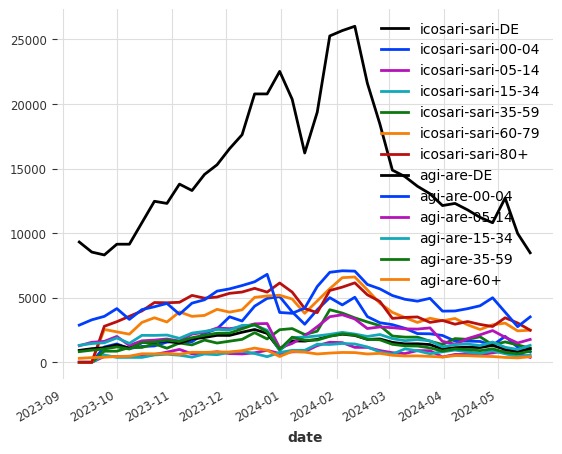

In [9]:
target_series.plot()
covariates.plot()

### One forecast

In [11]:
ts_nowcast = load_nowcast(forecast_date, probabilistic=True, local=True)

<Axes: xlabel='date'>

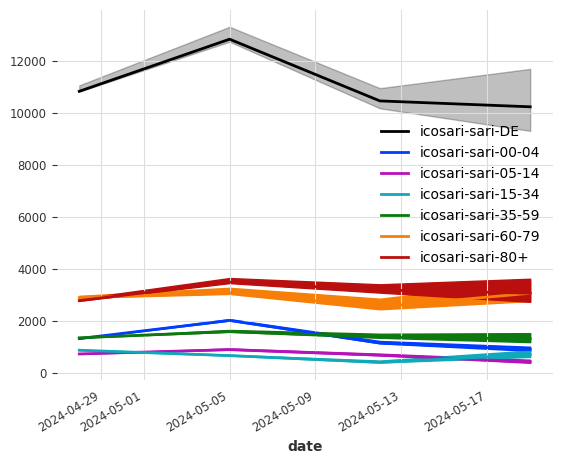

In [13]:
ts_nowcast.plot()

In [14]:
target_list = make_target_paths(target_series, ts_nowcast)

In [17]:
target_list = [encode_static_covariates(t, ordinal=False) for t in target_list]

In [18]:
covariates = [covariates]*len(target_list) if covariates else None

In [21]:
name = 'tsmixer'

In [23]:
model_path = f'../models/realtime/realtime_{name}-1.pt'
model = TSMixerModel.load(model_path)

In [24]:
model

TSMixerModel(output_chunk_shift=0, hidden_size=16, ff_size=16, num_blocks=4, activation=ReLU, dropout=0.2, norm_type=TimeBatchNorm2d, normalize_before=False, use_static_covariates=False, n_epochs=500, batch_size=8, optimizer_kwargs={'lr': 0.01, 'weight_decay': 0.0001}, input_chunk_length=8, optimizer_cls=<class 'torch.optim.adamw.AdamW'>, add_encoders={'datetime_attribute': {'future': ['month', 'weekofyear']}}, output_chunk_length=4, likelihood=NegativeBinomialLikelihood(), pl_trainer_kwargs={'enable_progress_bar': True, 'enable_model_summary': False, 'accelerator': 'cpu', 'callbacks': [<pytorch_lightning.callbacks.progress.rich_progress.RichProgressBar object at 0x7fa1ea082d30>]}, random_state=1)

In [25]:
fct = model.predict(n=4, 
                    series=target_list, 
                    past_covariates=covariates, 
                    num_samples=1000)

Predicting ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 0:00:05 • 0:00:00 0.66it/s

In [26]:
ts_forecast = concatenate(fct, axis='sample')

In [27]:
hfc_path = f'../data/submissions/{forecast_date}-icosari-sari-DW-{name}.csv'

In [28]:
hfc_path

'../data/submissions/2024-05-23-icosari-sari-DW-tsmixer.csv'

In [29]:
hfc = ts_forecast

In [30]:
df = reshape_hfc([hfc])

In [31]:
df = df.sort_values(['location', 'age_group', 'horizon', 'quantile'])

In [32]:
df.to_csv(hfc_path, index=False)

In [33]:
target_sari = load_target_series('sari')

In [44]:
stratum = 'DE'

In [37]:
stratum = '15-34'

In [42]:
stratum = '60-79'

In [41]:
target_sari.columns

Index(['icosari-sari-DE', 'icosari-sari-00-04', 'icosari-sari-05-14',
       'icosari-sari-15-34', 'icosari-sari-35-59', 'icosari-sari-60-79',
       'icosari-sari-80+'],
      dtype='object', name='component')

In [39]:
stratum = '80+'

<Axes: xlabel='date'>

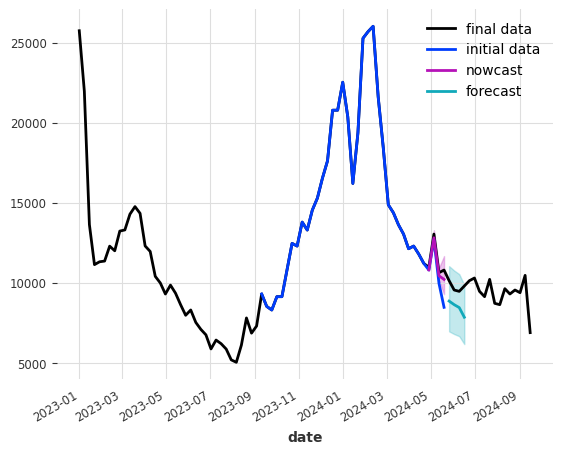

In [45]:
target_sari[f'icosari-sari-{stratum}'].plot(label='final data')
target_series[f'icosari-sari-{stratum}'].plot(label='initial data')
ts_nowcast[f'icosari-sari-{stratum}'].plot(label='nowcast')
# fct[0][f'icosari-sari-{stratum}'].plot(label='low')
# fct[-1][f'icosari-sari-{stratum}'].plot()
hfc[f'icosari-sari-{stratum}'].plot(label='forecast')

<Axes: xlabel='date'>

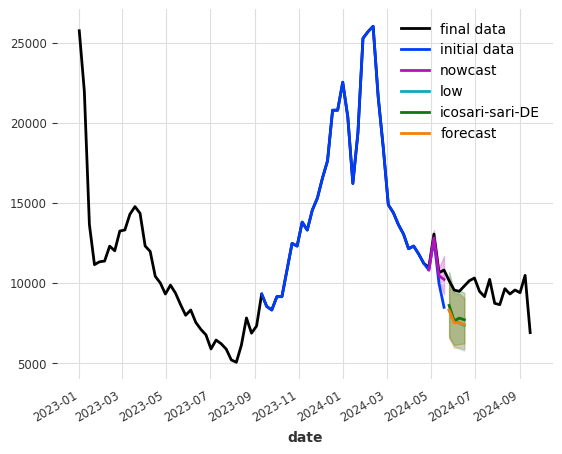

In [396]:
target_sari[f'icosari-sari-{stratum}'].plot(label='final data')
target_series[f'icosari-sari-{stratum}'].plot(label='initial data')
ts_nowcast[f'icosari-sari-{stratum}'].plot(label='nowcast')
fct[0][f'icosari-sari-{stratum}'].plot(label='low')
fct[-1][f'icosari-sari-{stratum}'].plot()
hfc[f'icosari-sari-{stratum}'].plot(label='forecast')

<Axes: xlabel='date'>

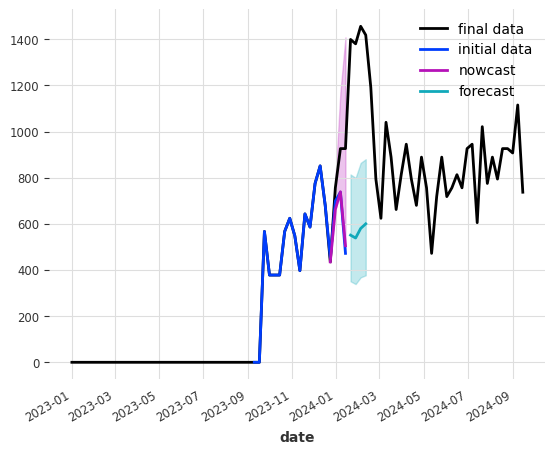

In [355]:
target_sari[f'icosari-sari-{stratum}'].plot(label='final data')
target_series[f'icosari-sari-{stratum}'].plot(label='initial data')
ts_nowcast[f'icosari-sari-{stratum}'].plot(label='nowcast')
hfc[f'icosari-sari-{stratum}'].plot(label='forecast')

<Axes: xlabel='date'>

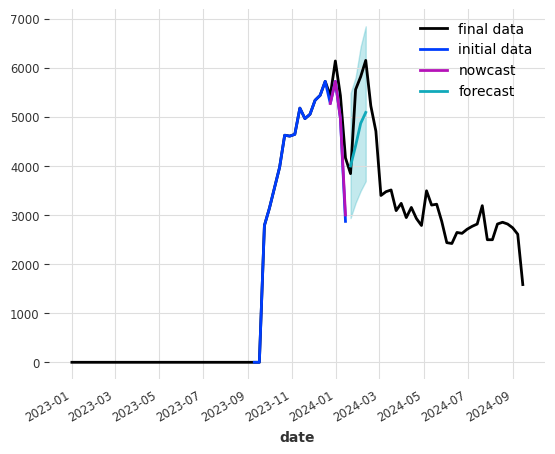

In [327]:
target_sari[f'icosari-sari-{stratum}'].plot(label='final data')
target_series[f'icosari-sari-{stratum}'].plot(label='initial data')
ts_nowcast[f'icosari-sari-{stratum}'].plot(label='nowcast')
hfc[f'icosari-sari-{stratum}'].plot(label='forecast')

<Axes: xlabel='date'>

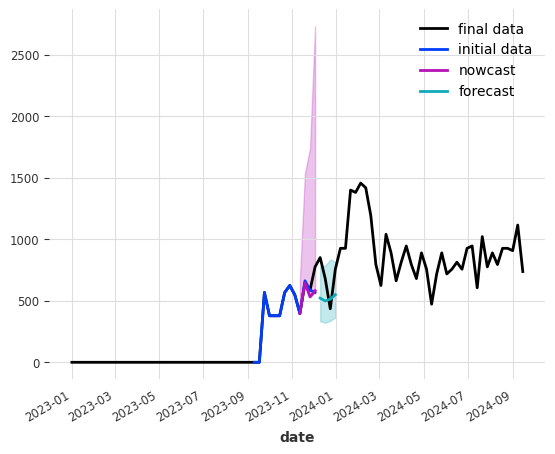

In [297]:
target_sari[f'icosari-sari-{stratum}'].plot(label='final data')
target_series[f'icosari-sari-{stratum}'].plot(label='initial data')
ts_nowcast[f'icosari-sari-{stratum}'].plot(label='nowcast')
hfc[f'icosari-sari-{stratum}'].plot(label='forecast')

<Axes: xlabel='date'>

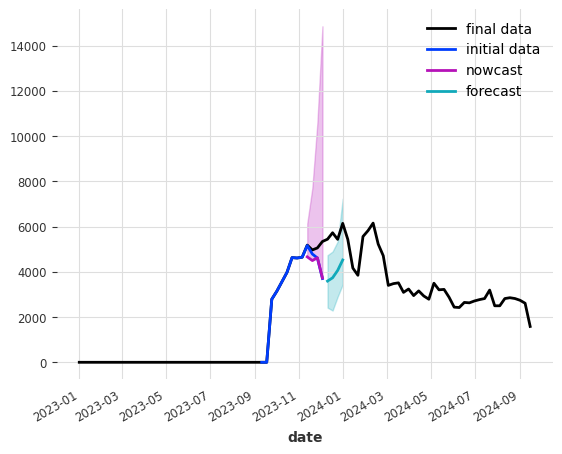

In [231]:
target_sari[f'icosari-sari-{stratum}'].plot(label='final data')
target_series[f'icosari-sari-{stratum}'].plot(label='initial data')
ts_nowcast[f'icosari-sari-{stratum}'].plot(label='nowcast')
hfc[f'icosari-sari-{stratum}'].plot(label='forecast')

In [46]:
target_sari = load_target_series('sari')

In [47]:
df_plot = prepare_plot_data(df, target_sari)

In [110]:
df_plot = prepare_plot_data(df, ts_sari)

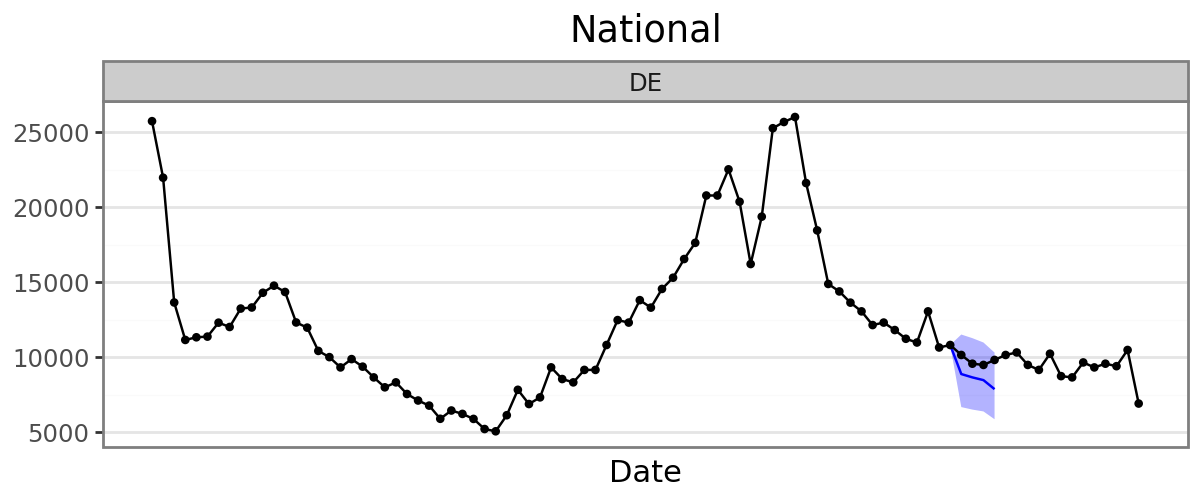

In [48]:
plot_forecasts(df_plot, 'national', start=0)

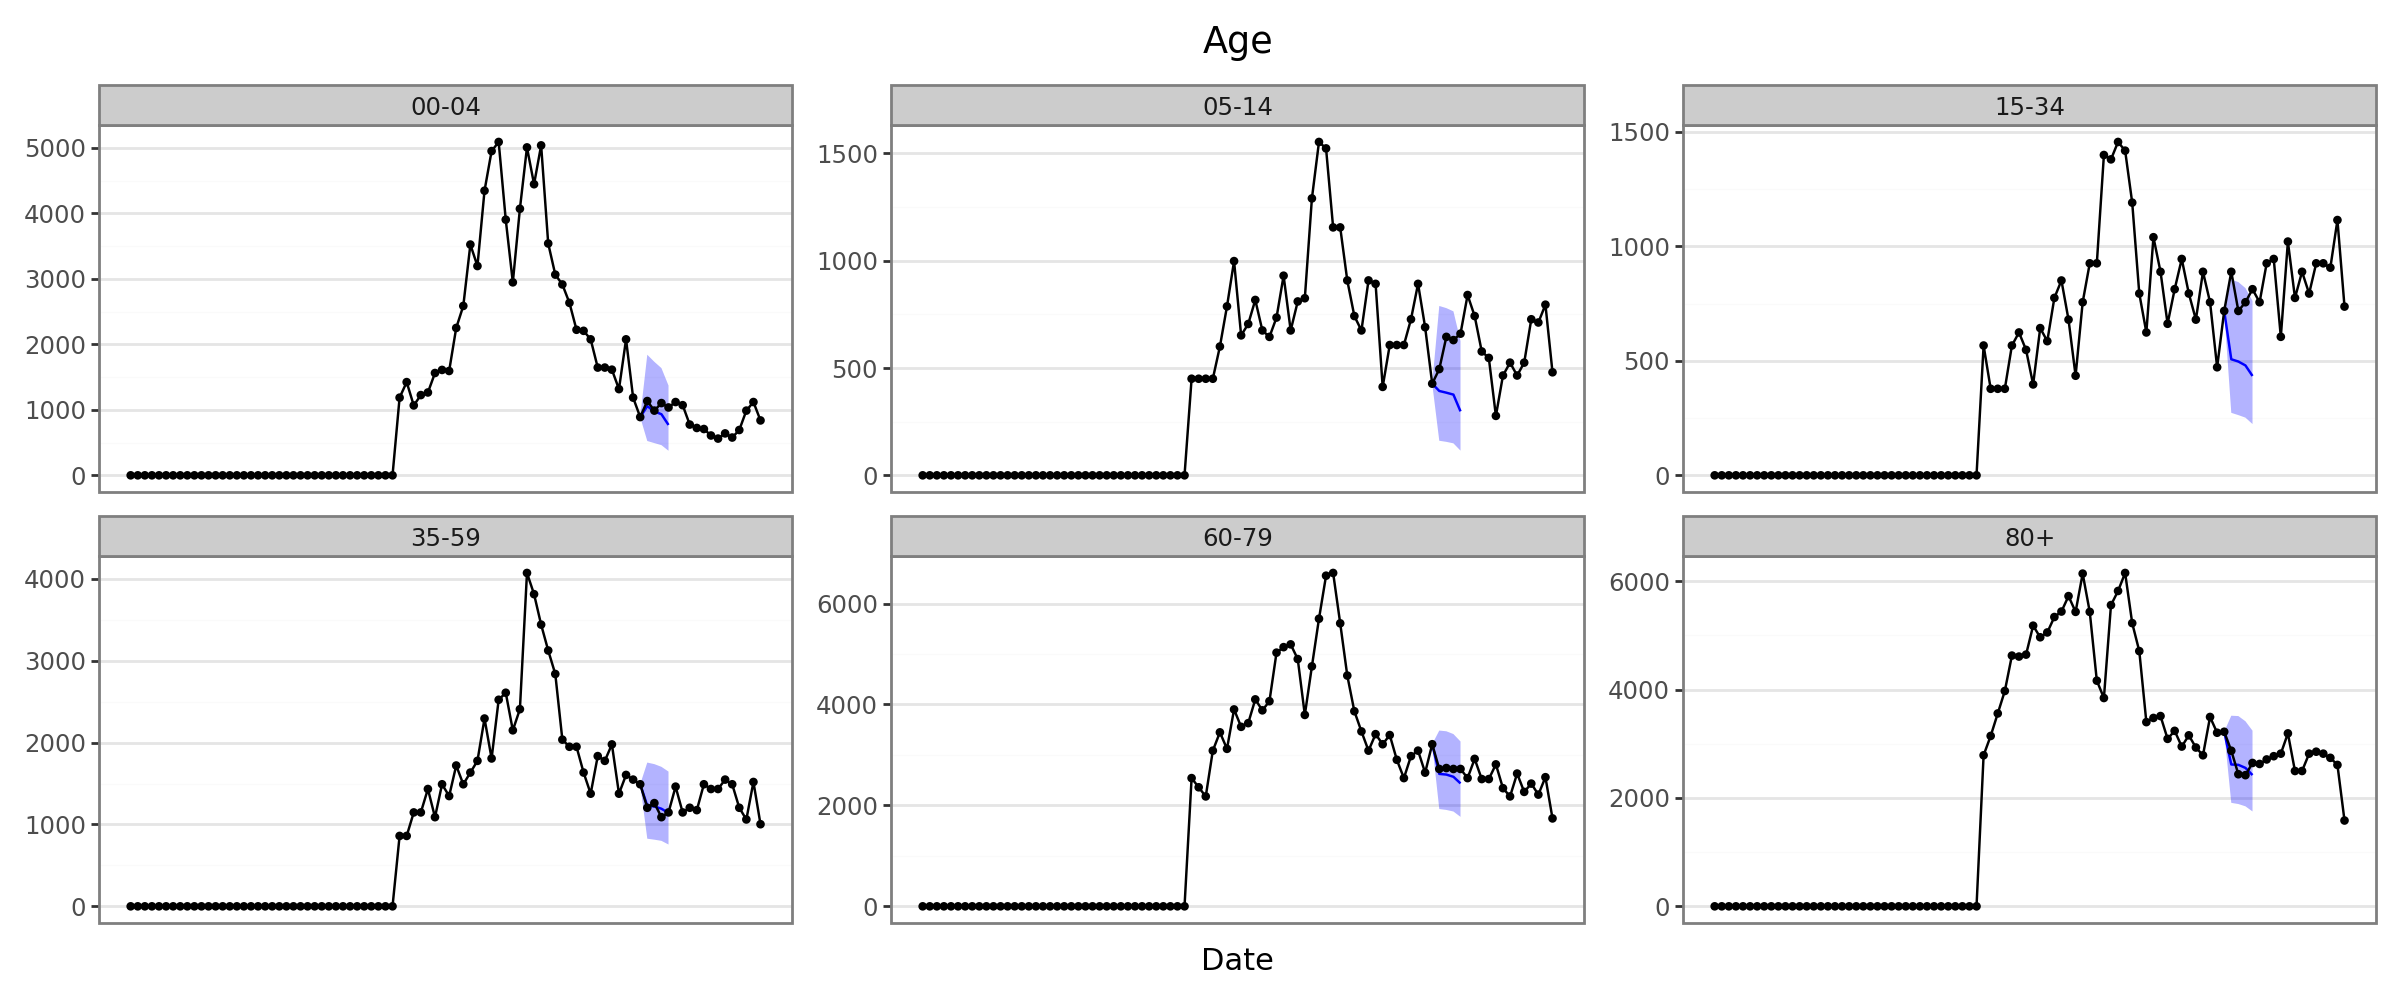

In [49]:
plot_forecasts(df_plot, 'age', start=0)

### Multiple forecasts

In [50]:
def compute_forecast(model, target_series, covariates, forecast_date, horizon, num_samples, probabilistic_nowcast=True, local=False):
    '''
    For every sample path given by the nowcasted quantiles, a probabilistic forecast is computed.
    These are then aggregated into one forecast by combining all predicted paths.
    '''
    ts_nowcast = load_nowcast(forecast_date, probabilistic_nowcast, local)
    target_list = make_target_paths(target_series, ts_nowcast)
    target_list = [encode_static_covariates(t, ordinal=False) for t in target_list]
     
    covariates = [covariates]*len(target_list) if covariates else None
      
    fct = model.predict(n=horizon, 
                        series=target_list, 
                        past_covariates=covariates, 
                        num_samples=num_samples)
      
    ts_forecast = concatenate(fct, axis='sample')
    
    return ts_forecast

In [56]:
target_series, covariates = retain_period_common_to_all([ts_sari, ts_are])

In [53]:
hfc = compute_forecast(model, target_series, covariates, forecast_date, HORIZON, NUM_SAMPLES, probabilistic_nowcast=True, local=True)

Predicting ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 0:00:05 • 0:00:00 0.67it/s

In [57]:
RANDOM_SEEDS = [1, 2, 3, 4, 5] # , 6, 7, 8, 9, 10]

In [60]:
dfs = []
for seed in RANDOM_SEEDS:
    print(seed)
    model_path = f'../models/realtime/realtime_{name}-{seed}.pt'
    model = TSMixerModel.load(model_path)
    
    hfc = compute_forecast(model, target_series, covariates, forecast_date, HORIZON, NUM_SAMPLES, probabilistic_nowcast=True, local=True)
    
    df = reshape_hfc([hfc])
    dfs.append(df)

Predicting ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 0:00:04 • 0:00:00 0.68it/s

In [61]:
df = pd.concat(dfs)
df = df.groupby(['location', 'age_group', 'forecast_date', 'target_end_date', 'horizon', 'type', 'quantile']).agg({'value': 'mean'}).reset_index()

In [62]:
df = df.sort_values(['location', 'age_group', 'horizon', 'quantile'])

In [63]:
df.to_csv(f'../data/submissions/{forecast_date}-icosari-sari-DW-{name}.csv', index=False)

# Plot forecasts

In [64]:
df_plot = prepare_plot_data(df, target_sari)

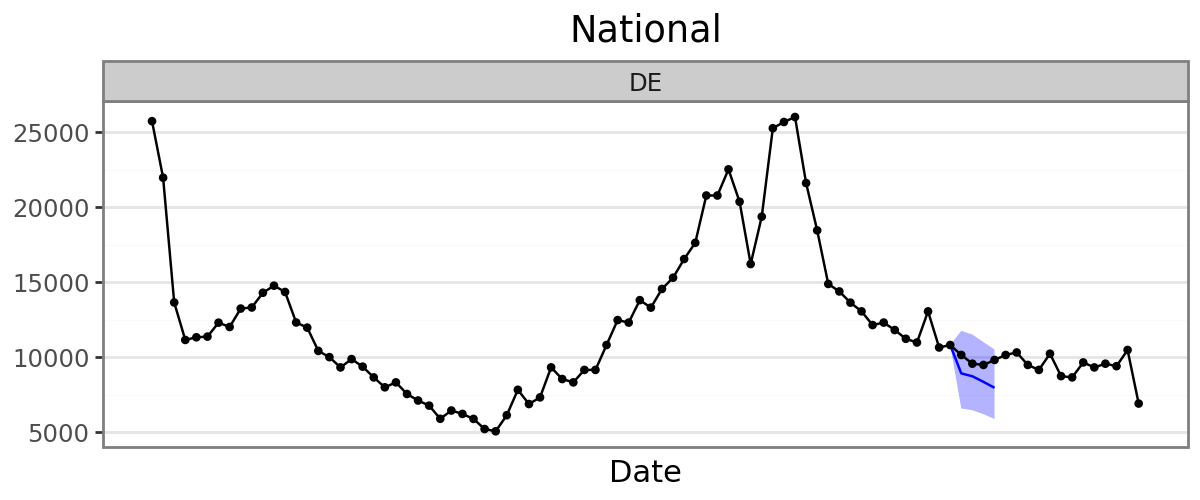

In [66]:
plot_forecasts(df_plot, 'national', start=0)

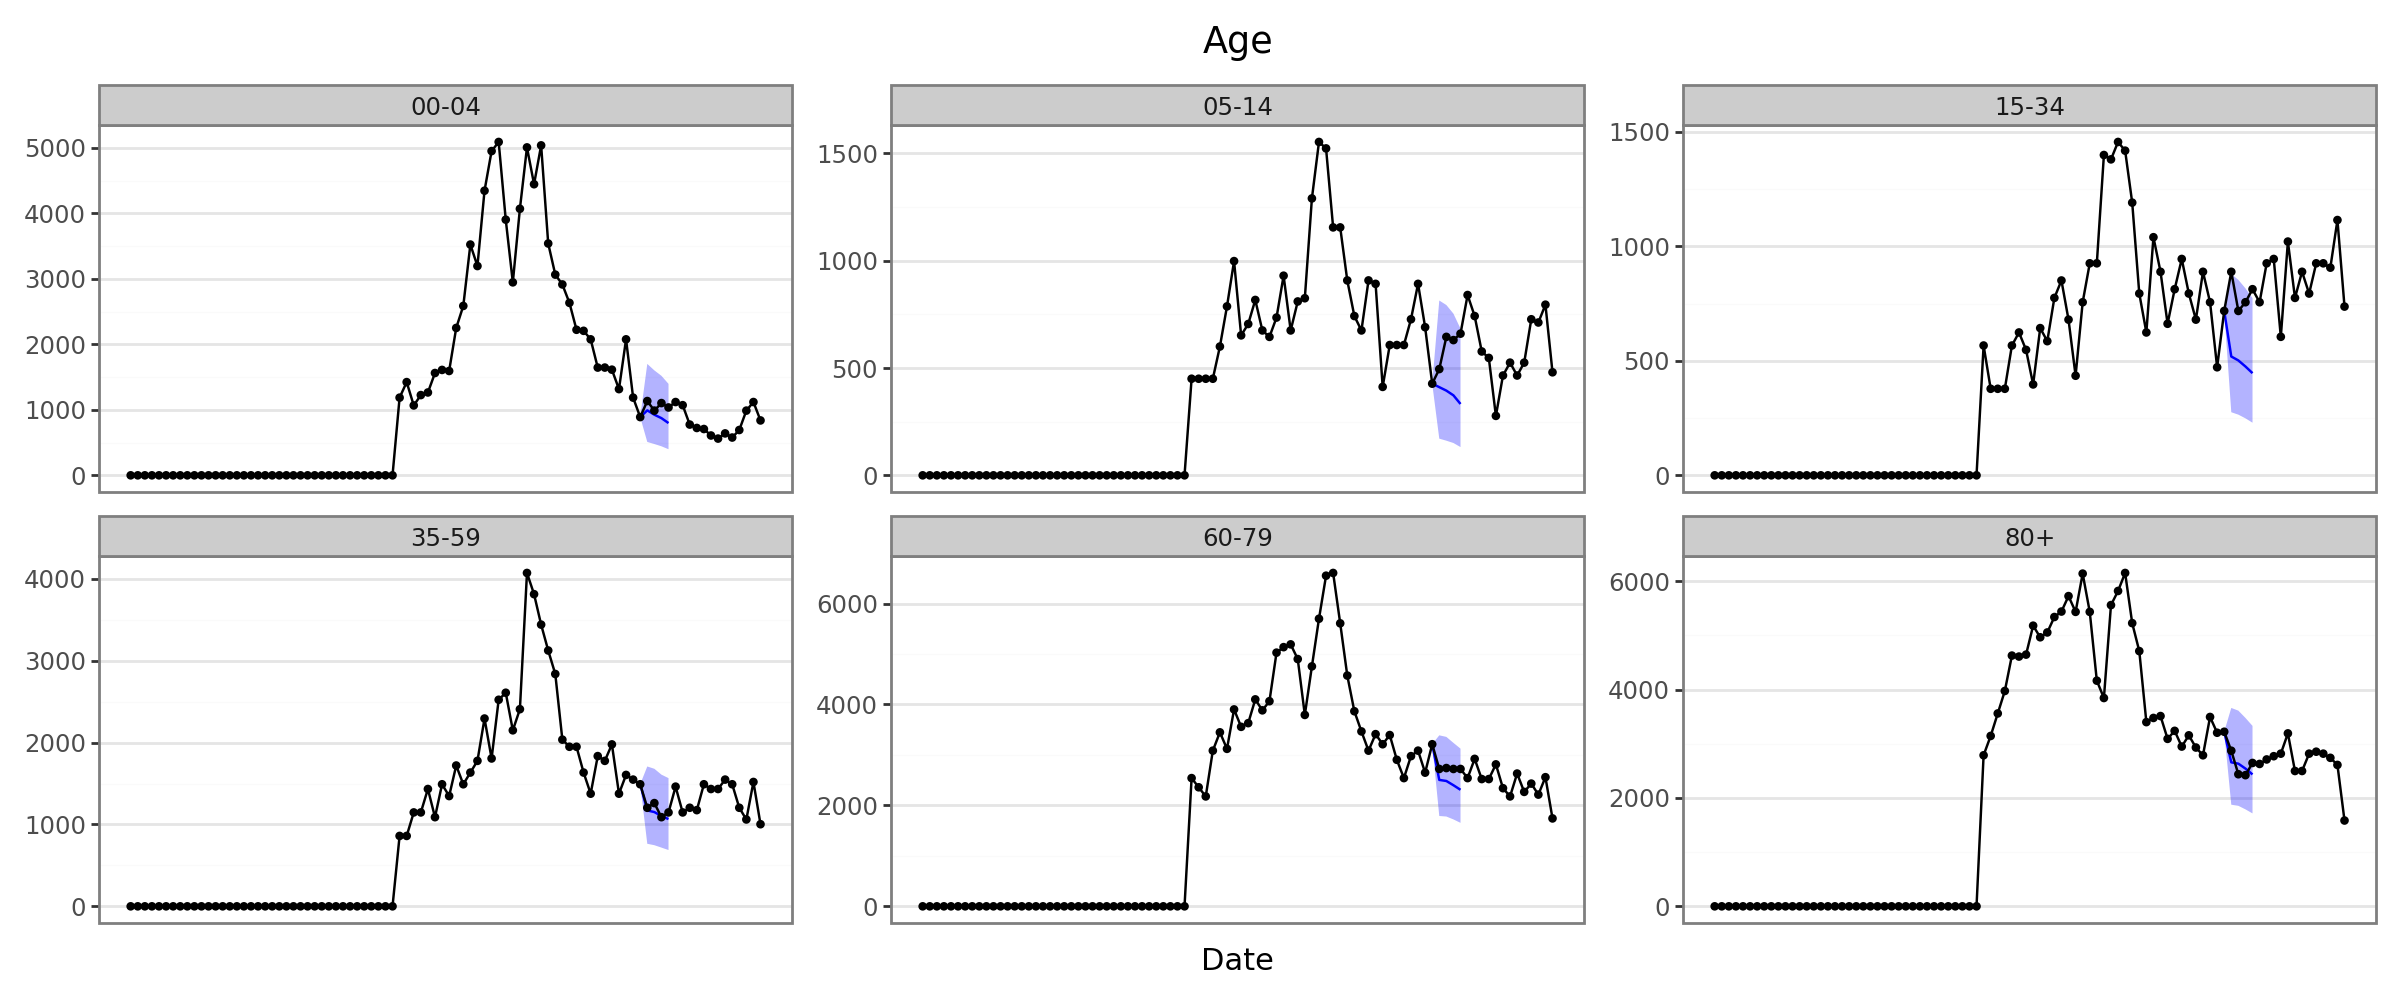

In [67]:
plot_forecasts(df_plot, 'age', start=0)